In [1]:
import sys


PACKAGE_PARENT = '../../../../'
sys.path.append(PACKAGE_PARENT)

from alphaslime.evaluate.eval_agents import EvaluateGameSA
from alphaslime.agents.other.semiGradSarsa import SemiGradSarsa
from alphaslime.approx.linearq import LinearQApprox

from pandas import read_csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gym
import csv

import time

In [2]:
# config intial properties

# env_id = 'CartPole-v0'
# env = gym.make(env_id)
# # seed the random numbers and the gym environment
# seed = 42
# # seed = int(time.time()) #1630937434
# np.random.seed(seed)    
# env.seed(seed)

# agent properties
# from sources
'''
https://www.martinholub.com/eth/code/2018/07/14/ReinforcementLearning.html

https://ikvibhav.medium.com/open-aigym-simple-sarsa-and-q-learning-reinforcement-learning-implementations-7d5ea6f1ff9
'''
epsilon = 0.2
gamma  = 0.95
alpha = 0.2

training_episodes = 1000
observation_dimension=4
action_table = [0, 1]

# epsilon = 1

env = gym.make('CartPole-v0')

# env = gym.make('MountainCar-v0')
# epsilon = 0
# gamma  = 1
# alpha = 0.0625
# observation_dimension=2
# training_episodes = 200
# action_table = [0, 1, 2]

# q function approximator
q_hat = LinearQApprox(action_table=action_table)
# set config file for agent
config = {
    'alpha': alpha,
    'gamma': gamma,
    'epsilon': epsilon,
    'action_table': action_table,
    'd': observation_dimension,
    't_max': 200,
    'max_score': None,
    'episode_printer': 100,
    'env': env,
    'weights':None,
    'q_hat': q_hat
}



In [3]:
# init the agent
agent = SemiGradSarsa(config)
# agent.EPSILON_DECAY_BASE = 0.99
agent.MINIMUM_EPSILON = 0.2
agent.EPSILON_DECAY_STATE = False

num_episodes = training_episodes
# train the agent
trained_agent = agent.train(num_episodes)

# get training data
training_data = np.array(trained_agent.train_data)

IHT full, starting to allow collisions


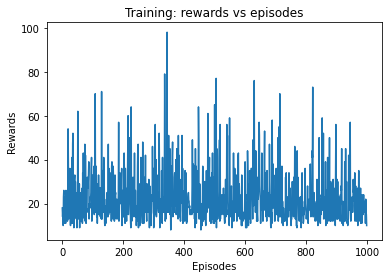

[[ 1.]
 [-7.]
 [ 2.]
 ...
 [ 1.]
 [ 1.]
 [14.]]


In [6]:
# plot training data
n, d = training_data.shape

episodes = np.arange(n)
# plot the training rewards 
plt.plot(episodes, training_data[:,0])
# print(training_data)
# plt.plot(training_data[:,1])
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Training: rewards vs episodes')
plt.show()

print(trained_agent.w)


In [5]:
x = np.array([
    [1],
    [1],
    [1]
])

w = np.array([
    [1,2,4],
    [1,2,4],
    [1,2,4],
])


print('x = {}'.format(x.shape))
print('w = {}'.format(w.shape))


print(np.dot(w, x))

x = (3, 1)
w = (3, 3)
[[7]
 [7]
 [7]]
